## Web APIs for data 

files needed = (None! It's all coming from the cloud.)

We have been loading data from files using `read_csv()` and `read_excel()`. A second way to input data into pandas is by directly downloading data from a web server through an *application programming interface* or api. 

The [wikipedia page](https://en.wikipedia.org/wiki/Web_API) isn't that insightful, but an api is a way to directly query a webserver and (in our case) ask for data. An api provides several advantages

1. You only download the data you need
2. You do not need to distribute data files with your code
3. You have access to the 'freshest data'

There are downsides, to using apis, too.

1. You need to be online to retrieve the data
2. The group hosting the data may 'revise' the data, making it difficult to replicate you results
3. The api may change, breaking your code.

On the whole, I find apis very convenient and useful. Let's dig in. 

### The packages
The package `pandas_datareader` collects functions that interact with several popular data sources to access their apis. These include

* ~~Google finance~~
* Morningstar
* St. Louis Fed's Fred (one of my favorites)
* The World Bank
* Eurostat
* Quandl


### API keys

Many data providers do not want some anonymous account connecting to the api and downloading data. These providers ask you to create an account and you are given an *api key* that you pass along with your request. Sometimes keys are free, sometimes they are not.

In this notebook, we will go through a few examples that do not require api keys. At the end of the notebook are a few examples that need api keys. If you sign up for (free) keys, you can try the examples out. We will not go through them in class, because your api key should only be used by you. 

### A quick detour: Installing packages with pip
We use the Anaconda distribution, which bundles python with many [other useful packages](https://docs.anaconda.com/anaconda/packages/py3.7_win-64/). `pandas_datareader`, however, is not one that is installed by default. \[Remember, we need to *install* a package before we can *import* it. We only need to install the package once.\]

We will install the package using 'pip' the python package manager. Before we install a package, let's see what packages we already have installed. 


1. Open an *Anaconda prompt*  (open the start menu and type: 'ana')
2. Run the command `pip list`

Do you see pandas-datareader in the list? If not, it is not installed and not ready to be imported.

In [1]:
pip install --user pandas_datareader

Looking in indexes: https://mirror.ssc.wisc.edu/pypi/web/simple/
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader

 ### Installing a package
 
 1. At the *Anaconda prompt*: run the command `pip install --user pandas_datareader` and hit enter
 2. In your jupyter notebook, **restart the kernel** from the Kernel menu

That should do it. It might take a minute, and fill the command window with text, but in the end it should have installed. You will probably see a message about updating pip. We can safely ignore it. We can confirm that the package is installed by running `pip list` at the *Anaconda prompt* again. \[The option `--user` is important. It tells pip to install the package into our user drive, in which we have permission to save files.\]

Now that the package is installed, we can import it into our program like usual.


In [3]:
import pandas as pd                       # pandas, shortened to pd
import numpy as np

# If you receive an error while trying to load data_reader try uncommenting the line below
# This is/was a problem with an older version of pandas_datareader
# pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web    # we are grabbing the data function from the package
import matplotlib.pyplot as plt           # for plotting
import datetime as dt                     # for time and date

### FRED
The FRED database is hosted by the St. Louis FRB. It houses lots of economic and financial data. It is US-centric but has some international data, too. 

To use the FRED api you need to know the variable codes. The easiest way to do it to search on the [FRED website](https://fred.stlouisfed.org/).  

The pandas_datareader documentation for FRED is [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred).

In [4]:
# These codes are for real US gdp and the working-age population.
# The first code seems intuitive; the second does not.
codes = ['GDPCA', 'LFWA64TTUSA647N']  
                                      

# If you do not spec an end date it returns up to the most recent date.
# You can also pass datetime objects as start and end 
fred = web.DataReader(codes, 'fred', '1960-01-01')

fred.head()


,GDPCA,LFWA64TTUSA647N
DATE,,
1960-01-01,3262.061,1.019082e+08
1961-01-01,3345.690,1.030842e+08
1962-01-01,3550.684,1.035988e+08
1963-01-01,3705.318,1.054704e+08
1964-01-01,3918.791,1.073338e+08


Fred already assigned the date variable to the index. You can check to see that it is a datetime index. Nice.

In [5]:
# Give the variables some reasonable names
fred = fred.rename(columns={'GDPCA':'gdp', 'LFWA64TTUSA647N':'wap'})           

# Let's plot real gdp per working age person
fred['gdp_wap'] = fred['gdp']*1000000000/fred['wap']  # gdp data is in billions

fred.head(2)

,gdp,wap,gdp_wap
DATE,,,
1960-01-01,3262.061,101908250.0,32009.783310
1961-01-01,3345.690,103084250.0,32455.879535


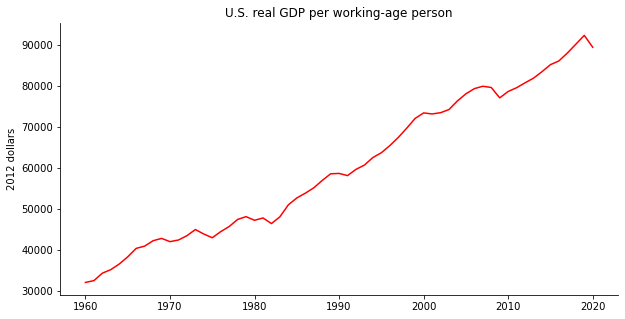

In [6]:

fig, ax = plt.subplots(figsize=(10,5))
#ax.plot(fred.index, np.log2(fred['gdp_wap']), color='red')
ax.plot(fred.index, fred['gdp_wap'], color='red')

ax.set_ylabel('2012 dollars')
ax.set_title('U.S. real GDP per working-age person')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



You are probably seeing a pink-box warning when you ran the code to plot. This is an issue with pandas and matplotlib that will be resolved in the future. That is the same warning we saw in the previous notebook. We can ignore this warning. 

### Stooq for indexes

Stooq provides historical pricing for indexes ([docs](https://pandas-datareader.readthedocs.io/en/latest/readers/stooq.html)). Let's grab the data for the Dow Jones Industrial Index. The ticker symbol for the Dow is '^DJI'. 

In [7]:
dj = web.DataReader('^DJI', 'stooq') # The Dow
sp = web.DataReader('^SPX', 'stooq') # The S&P 500

In [8]:
print(sp.head(2))
print(sp.tail(2))

               Open     High      Low    Close      Volume
Date                                                      
2021-11-19  4708.44  4717.75  4694.22  4697.96  2450161621
2021-11-18  4700.72  4708.80  4672.78  4704.54  2229419489
               Open    High      Low    Close      Volume
Date                                                     
2016-11-22  2201.56  2204.8  2194.51  2202.94  2198855556
2016-11-21  2186.43  2198.7  2186.43  2198.18  2003894444


In [9]:
print(dj.head(2))
print(dj.tail(2))


                Open      High       Low     Close     Volume
Date                                                         
2021-11-19  35879.09  35879.09  35555.37  35601.98  491570307
2021-11-18  35901.69  35952.63  35654.39  35870.95  480002629
                Open      High       Low     Close    Volume
Date                                                        
2016-11-22  18970.39  19043.90  18962.82  19023.87  85317361
2016-11-21  18898.68  18960.76  18883.10  18956.69  80518662


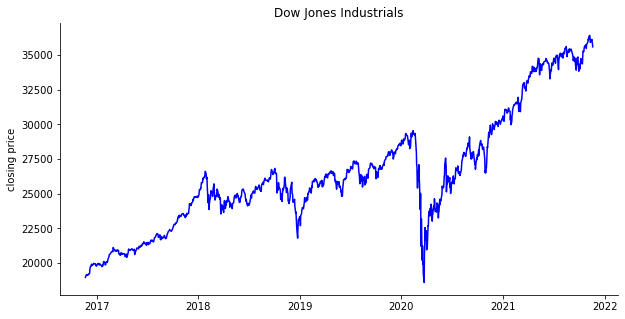

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(dj.index, dj['Close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Dow Jones Industrials')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Practice: APIs

Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

How has inflation in the United States evolved over the last 60 years? Let's investigate.

1. Go the FRED website and find the code for the 'Consumer price index for all urban consumers: All items less food and energy' 
2. Use the api to get the data from 1960 to the most recent. 

In [11]:
#1
start = dt.datetime(1960,1,1)

CPI = web.DataReader('CPILFESL', 'fred' , start)

CPI.tail(2)


,CPILFESL
DATE,
2021-09-01,280.017
2021-10-01,281.695


3. Create a variable in your DataFrame that hold the growth rate of the CPI&mdash;the inflation rate. Compute it in percentage terms.

In [12]:
#3

CPI['inflation_rate'] = CPI['CPILFESL'].pct_change() *100

CPI.head(2)

,CPILFESL,inflation_rate
DATE,,
1960-01-01,30.5,NaN
1960-02-01,30.6,0.327869


4. Plot it. What patterns do you see? 

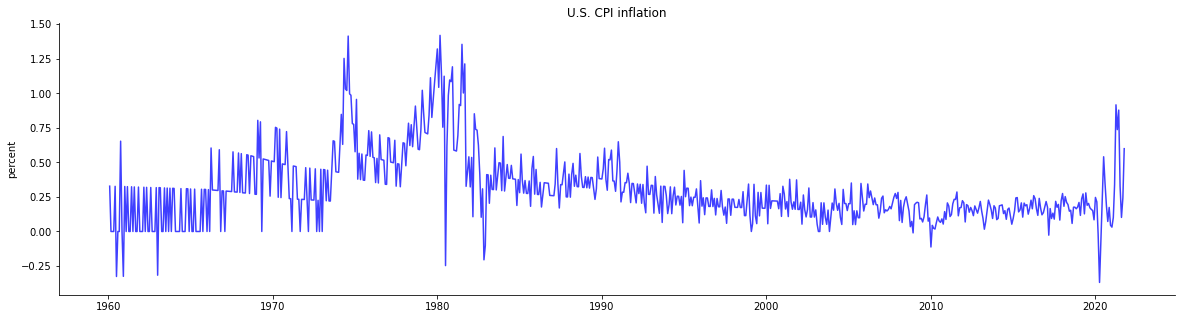

In [20]:
#4
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(CPI.index, CPI['inflation_rate'], color='blue', alpha = 0.75)

ax.set_ylabel('percent')
ax.set_title('U.S. CPI inflation')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

5. Challenging. We computed the month-to-month inflation rate above. This is not the inflation rate we usually care about. Can you compute and plot the year-over-year inflation rate? For example, the inflation rate for 1962-05-01 would be the cpi in 1962-05-01 divided by the cpi in 1961-05-01. \[Hint: Check the documentation for `pct_change()`.

In [14]:
CPI['infl_year'] = CPI['CPILFESL'].pct_change(periods=12)*100

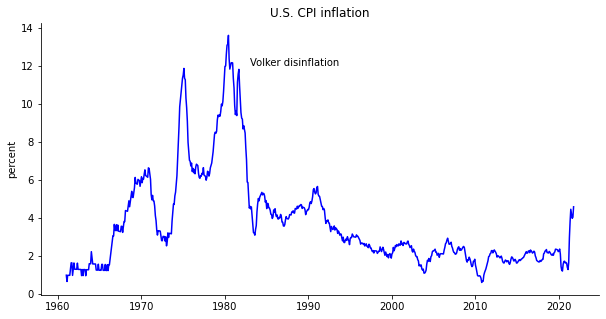

In [15]:
#5
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(CPI.index, CPI['infl_year'], color='blue')

ax.set_ylabel('percent')
ax.set_title('U.S. CPI inflation')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(dt.datetime(1983, 1,1), 12, 'Volker disinflation')

plt.show()

6. Annotate the decrease in inflaton around 1983 as 'Volker disinflation'

# The examples below requires an api key

Where you see the code `your_api_key` is where you should enter your own api key. You need to go to their websites and sign up. The examples should work then. 

### Stock prices with iex

According to the [docs](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#morningstar):
>The Investors Exchange (IEX) provides a wide range of data through an API. Historical stock prices are available for up to 5 years.

IEX is one of those companies that requires an api key. These keys can be [pricey](https://iexcloud.io/pricing/) because their target market are business and app developers. They offer a free key, though for experimentation. Very cool of them. 

You can sign up here: [https://iexcloud.io/cloud-login#/register/](https://iexcloud.io/cloud-login#/register/)

In [16]:
# Sometimes you pass your key in the DataReader method. In this case, you save your key as an environmental variable. 
# This means you do not need to keep specifying your key each time you use IEX.

import os
os.environ["IEX_API_KEY"] = 'your_api_key'

In [21]:
# Harley Davidson prices. The ticker is 'HOG'

start = dt.datetime(2016, 9, 1)
end = dt.datetime(2020, 3, 1)

harley = web.DataReader('HOG', 'iex', start, end)

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=HOG&types=chart&range=max&token=your_api_key
Response Text:
b'The API key provided is not valid.'

In [22]:
harley.tail()


NameError: name 'harley' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(harley.index, harley['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
# Ahhh! Not a good looking figure.

# We need to set the index to a datetime object so mpl can get the axis right...
# FRED did this for us. 

harley.index = pd.to_datetime(harley.index)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(harley.index, harley['close'], color='blue')

ax.set_ylabel('closing price')
ax.set_title('Harley Davidson stock prices')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Quandl

[Quandl](https://www.quandl.com/) is another data aggregation site. Like FRED or IEX, it collects data from several sources and makes them available. 

>The premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks.


Quandl has free and pay-to-use data. You can sign up for a free api key. Quandl has also developed their own [python package](https://www.quandl.com/tools/python).

The U.S. Department of Energy data is available through this facility (and is free). The quandl code for [natural gas futures](https://www.quandl.com/data/EIA/NG_RNGC3_M-Natural-Gas-Futures-Contract-3-Monthly)  is `EIA/NG_RNGC3_M`. Let's take a look.

In [ ]:
# You will need to provide your quandl key.
my_quandl_key = 'your_api_key'

gas = web.DataReader('EIA/NG_RNGC3_M', 'quandl', api_key=my_quandl_key)
print(gas.head(2))
print(gas.tail(2))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(gas.index, gas['Value'], color='blue')

ax.set_ylabel('dollars per million BTU')
ax.set_title('3-month natural gas future prices (monthly)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()